# AC1: Rips, Cech, Alpha

Alumna: Ana Paola Almeida Pérez

Matrícula: A00833937

Curso: MA2007B.602

Uso de geometría y topología para ciencia de datos (Gpo 602)

## Librerías

In [1]:
pip install gudhi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 3.0 MB/s eta 0:00:00


In [35]:
import numpy as np # Arreglos
import pandas as pd # Trabajar con bases de datos
import matplotlib.pyplot as plt # Gragicar
from matplotlib import cm # Para manejar colores
from scipy.spatial.distance import squareform, pdist # Para calcular matrices de distancias y hacer inferencias de los parámetros
import matplotlib.patches as mpatches # Para hacer elipses
from matplotlib.collections import PatchCollection # Para hacer elipses
import gudhi # Para hacer la filtración de complejos simpliciales de Rips y Alpha

 ## Funciones

In [36]:
#Rips
def plot_rips_complex(data, R, label = "data", col = 1, maxdim = 2):
  tab10 = cm.get_cmap('tab10')



  fig, ax = plt.subplots(figsize = (6,6))
  ax.set_title(label)
  ax.scatter(
      data [: , 0] , data [: , 1] , label = label ,
      s =8 , alpha =0.9 , c= np . array (tab10 ([col] * len(data)))
  )

  for xy in data :
    ax.add_patch(mpatches.Circle(xy , radius= R, fc= 'none' , ec = tab10(col) , alpha =0.2))

  for i , xy in enumerate ( data) :
    if maxdim >=1:
      for j in range ( i + 1 , len ( data)):
        pq = data[j]
        if ( xy != pq ).all () and (np.linalg.norm (xy - pq) <= R
  ):

            pts = np . array ([ xy , pq ])
            ax . plot ( pts [: , 0] , pts [: , 1] , color = tab10(col) ,
            alpha =0.6 , linewidth =1)
        if maxdim == 2:
            for k in range ( j + 1 , len ( data ) ):
                ab = data [ k ]
                if (( ab != pq ).all()
                        and ( np . linalg . norm ( xy - pq ) <= R )
                        and ( np . linalg . norm ( xy - ab ) <= R )
                        and ( np . linalg . norm ( pq - ab ) <= R )
                ):
                    pts = np.array ([ xy , pq , ab ])
                    ax.fill (pts [: , 0] , pts [: , 1] , facecolor = tab10(col), alpha =0.1)
                pass
  plt.axis('equal')

  plt.tight_layout()
  plt . show ()
  pass

In [37]:
radios = [0.1, 0.2, 0.5, 1]

# Define una función para graficar los complejos de Rips con diferentes radios
def plot_rips_complexes(data, radios):
    for R in radios:
        plt.figure(figsize=(8, 6))
        plot_rips_complex(data.to_numpy(), R, label="Rips Complex (R=" + str(R) + ")", col=1, maxdim=1)


## Activity 1

### Rips

In [38]:
data = pd.read_csv("Activity1.csv", names=["a", "b"])

In [39]:
# Ordena los datos por la primera columna 'a' de manera ascendente
data = data.sort_values(by='a')

# Define los puntos X usando los datos del DataFrame
X = data.values

# Define el radio máximo y el máximo de dimensiones
max_edge_length = 2.3
max_dimension = 2

# Calcula el complejo de Rips
rips_complex = gudhi.RipsComplex(points=X, max_edge_length=max_edge_length)

# Genera el árbol de complejos simpliciales
simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)

# Imprime información sobre el complejo de Rips
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
  repr(simplex_tree.num_simplices()) + ' simpllices - ' + \
  repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
  print(fmt % tuple(filtered_value))

Se han truncado las últimas 5000 líneas del flujo de salida.
[1, 38, 58] -> 2.19
[2, 38, 58] -> 2.19
[3, 38, 58] -> 2.19
[4, 38, 58] -> 2.19
[5, 38, 58] -> 2.19
[6, 38, 58] -> 2.19
[7, 38, 58] -> 2.19
[8, 38, 58] -> 2.19
[9, 38, 58] -> 2.19
[10, 38, 58] -> 2.19
[11, 38, 58] -> 2.19
[12, 38, 58] -> 2.19
[13, 38, 58] -> 2.19
[14, 38, 58] -> 2.19
[15, 38, 58] -> 2.19
[16, 38, 58] -> 2.19
[17, 38, 58] -> 2.19
[18, 38, 58] -> 2.19
[19, 38, 58] -> 2.19
[20, 38, 58] -> 2.19
[21, 38, 58] -> 2.19
[22, 38, 58] -> 2.19
[23, 38, 58] -> 2.19
[24, 38, 58] -> 2.19
[25, 38, 58] -> 2.19
[26, 38, 58] -> 2.19
[27, 38, 58] -> 2.19
[28, 38, 58] -> 2.19
[29, 38, 58] -> 2.19
[30, 38, 58] -> 2.19
[31, 38, 58] -> 2.19
[32, 38, 58] -> 2.19
[33, 38, 58] -> 2.19
[34, 38, 58] -> 2.19
[35, 38, 58] -> 2.19
[36, 38, 58] -> 2.19
[37, 38, 58] -> 2.19
[38, 39, 58] -> 2.19
[38, 41, 58] -> 2.19
[38, 42, 58] -> 2.19
[38, 43, 58] -> 2.19
[38, 44, 58] -> 2.19
[38, 46, 58] -> 2.19
[38, 47, 58] -> 2.19
[38, 48, 58] -> 2.19
[38

<ipython-input-36-c856c8a91a95>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


<Figure size 800x600 with 0 Axes>

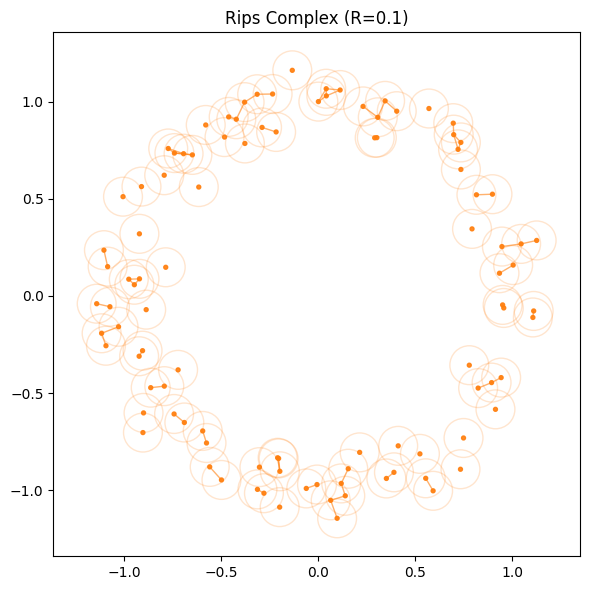

<Figure size 800x600 with 0 Axes>

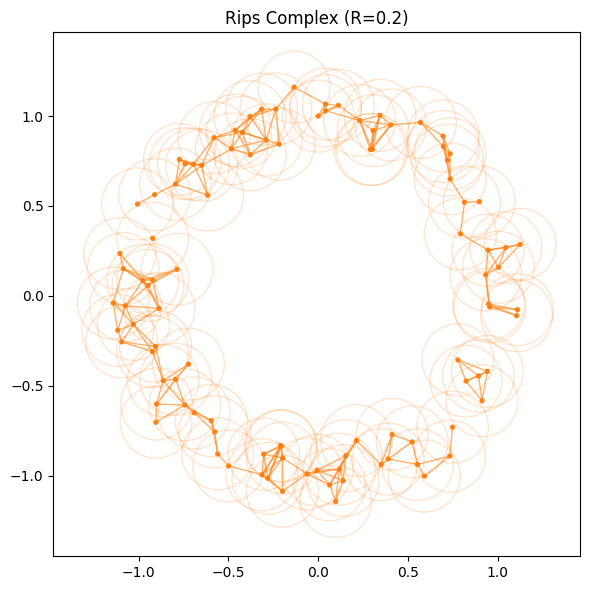

<Figure size 800x600 with 0 Axes>

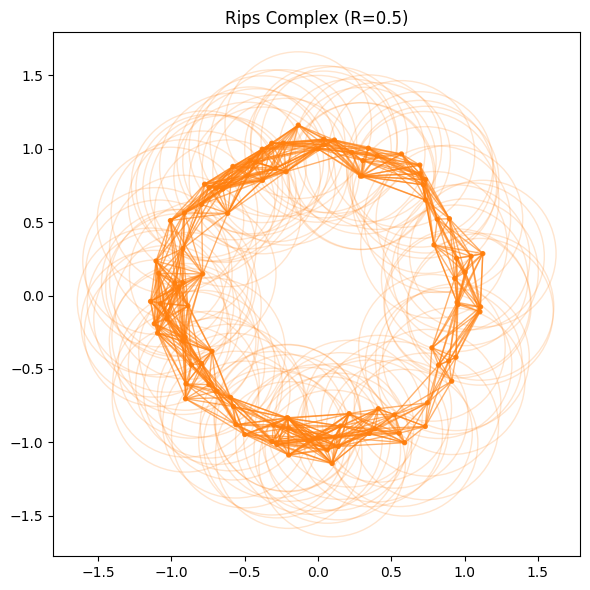

<Figure size 800x600 with 0 Axes>

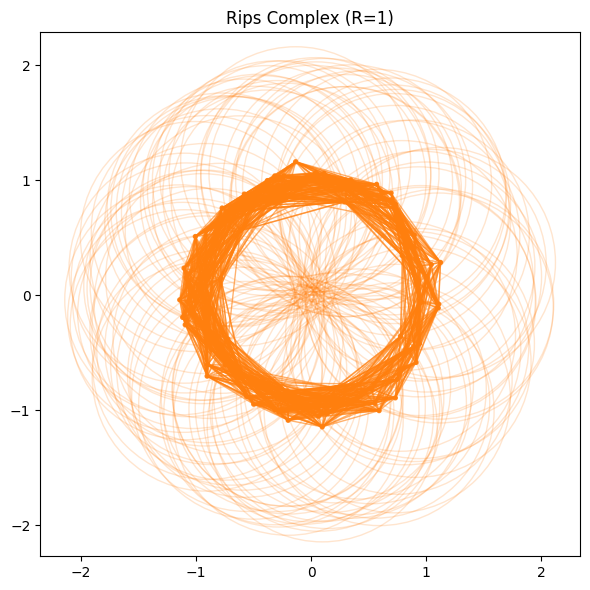

In [40]:
# Llama a la función para graficar los complejos de Rips con distintos radios
plot_rips_complexes(data, radios)

### Alpha

In [41]:
alpha1 = gudhi.AlphaComplex(points = X)

simplex_tree = alpha1.create_simplex_tree()

result_str = 'Alpha complex 1 is of dimension ' + ' - ' + \
  repr(simplex_tree.num_simplices()) + ' simpllices - ' + \
  repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)
fmt = '%s -> %f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex 1 is of dimension  - 563 simpllices - 101 vertices.
[0] -> 0.000000
[1] -> 0.000000
[2] -> 0.000000
[3] -> 0.000000
[4] -> 0.000000
[5] -> 0.000000
[6] -> 0.000000
[7] -> 0.000000
[8] -> 0.000000
[9] -> 0.000000
[10] -> 0.000000
[11] -> 0.000000
[12] -> 0.000000
[13] -> 0.000000
[14] -> 0.000000
[15] -> 0.000000
[16] -> 0.000000
[17] -> 0.000000
[18] -> 0.000000
[19] -> 0.000000
[20] -> 0.000000
[21] -> 0.000000
[22] -> 0.000000
[23] -> 0.000000
[24] -> 0.000000
[25] -> 0.000000
[26] -> 0.000000
[27] -> 0.000000
[28] -> 0.000000
[29] -> 0.000000
[30] -> 0.000000
[31] -> 0.000000
[32] -> 0.000000
[33] -> 0.000000
[34] -> 0.000000
[35] -> 0.000000
[36] -> 0.000000
[37] -> 0.000000
[38] -> 0.000000
[39] -> 0.000000
[40] -> 0.000000
[41] -> 0.000000
[42] -> 0.000000
[43] -> 0.000000
[44] -> 0.000000
[45] -> 0.000000
[46] -> 0.000000
[47] -> 0.000000
[48] -> 0.000000
[49] -> 0.000000
[50] -> 0.000000
[51] -> 0.000000
[52] -> 0.000000
[53] -> 0.000000
[54] -> 0.000000
[55] -> 0

## Activity 2

### Rips

In [42]:
data = pd.read_csv("Activity2.csv", names=["a", "b"])

In [43]:
# Ordena los datos por la primera columna 'a' de manera ascendente
data = data.sort_values(by='a')

# Define los puntos X usando los datos del DataFrame
X = data.values

# Define el radio máximo y el máximo de dimensiones
max_edge_length = 4
max_dimension = 2

# Calcula el complejo de Rips
rips_complex = gudhi.RipsComplex(points=X, max_edge_length=max_edge_length)

# Genera el árbol de complejos simpliciales
simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)

# Imprime información sobre el complejo de Rips
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
  repr(simplex_tree.num_simplices()) + ' simpllices - ' + \
  repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
  print(fmt % tuple(filtered_value))

Se han truncado las últimas 5000 líneas del flujo de salida.
[0, 64, 96] -> 3.26
[0, 65, 96] -> 3.26
[0, 66, 96] -> 3.26
[0, 67, 96] -> 3.26
[0, 68, 96] -> 3.26
[0, 69, 96] -> 3.26
[0, 70, 96] -> 3.26
[0, 71, 96] -> 3.26
[0, 72, 96] -> 3.26
[0, 73, 96] -> 3.26
[0, 74, 96] -> 3.26
[0, 75, 96] -> 3.26
[0, 76, 96] -> 3.26
[0, 77, 96] -> 3.26
[0, 78, 96] -> 3.26
[0, 79, 96] -> 3.26
[0, 80, 96] -> 3.26
[0, 81, 96] -> 3.26
[0, 82, 96] -> 3.26
[0, 83, 96] -> 3.26
[0, 84, 96] -> 3.26
[0, 85, 96] -> 3.26
[0, 86, 96] -> 3.26
[0, 87, 96] -> 3.26
[0, 88, 96] -> 3.26
[0, 89, 96] -> 3.26
[0, 90, 96] -> 3.26
[0, 91, 96] -> 3.26
[0, 92, 96] -> 3.26
[0, 93, 96] -> 3.26
[0, 94, 96] -> 3.26
[30, 99] -> 3.27
[7, 30, 99] -> 3.27
[8, 30, 99] -> 3.27
[10, 30, 99] -> 3.27
[11, 30, 99] -> 3.27
[12, 30, 99] -> 3.27
[14, 30, 99] -> 3.27
[15, 30, 99] -> 3.27
[16, 30, 99] -> 3.27
[17, 30, 99] -> 3.27
[18, 30, 99] -> 3.27
[19, 30, 99] -> 3.27
[20, 30, 99] -> 3.27
[23, 30, 99] -> 3.27
[24, 30, 99] -> 3.27
[25, 30, 9

<ipython-input-36-c856c8a91a95>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


<Figure size 800x600 with 0 Axes>

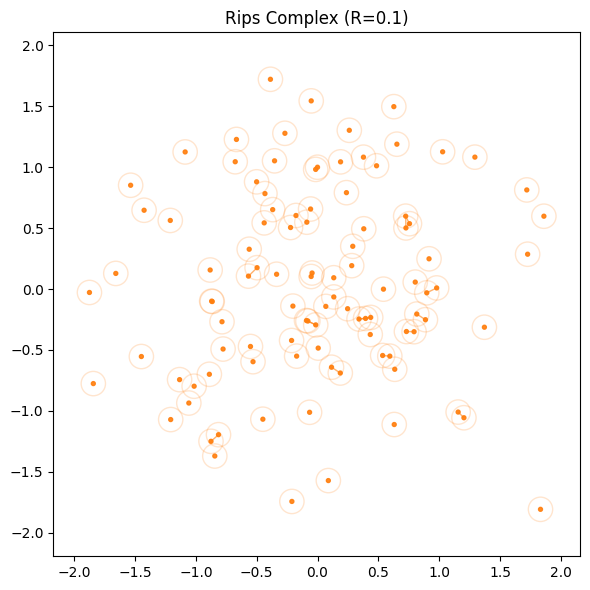

<Figure size 800x600 with 0 Axes>

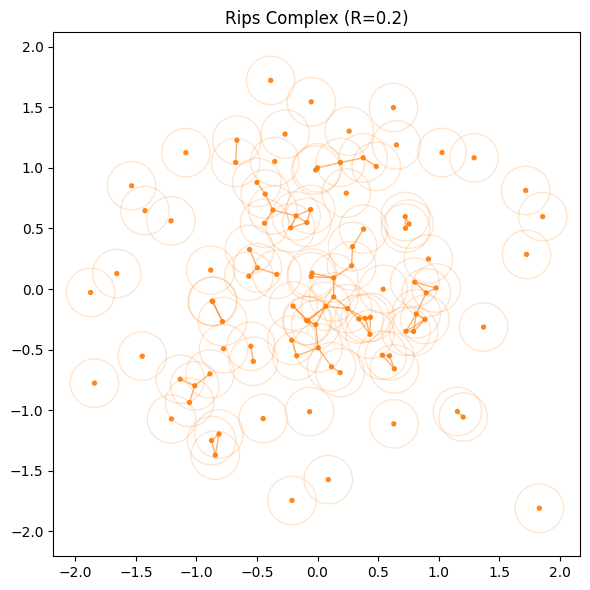

<Figure size 800x600 with 0 Axes>

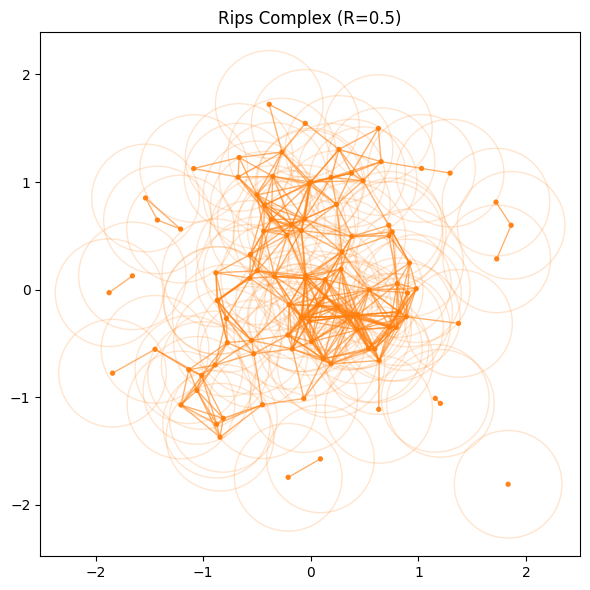

<Figure size 800x600 with 0 Axes>

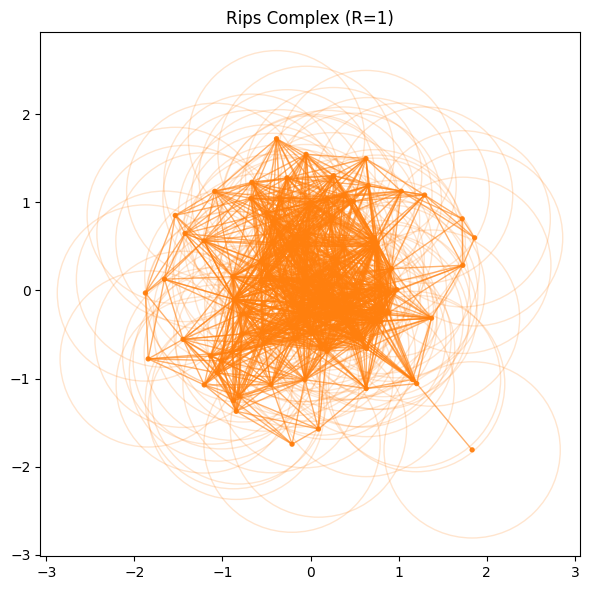

In [44]:
# Llama a la función para graficar los complejos de Rips con distintos radios
plot_rips_complexes(data, radios)

### Alpha

In [45]:
alpha1 = gudhi.AlphaComplex(points = X)

simplex_tree = alpha1.create_simplex_tree()

result_str = 'Alpha complex 1 is of dimension ' + ' - ' + \
  repr(simplex_tree.num_simplices()) + ' simpllices - ' + \
  repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)
fmt = '%s -> %f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex 1 is of dimension  - 579 simpllices - 101 vertices.
[0] -> 0.000000
[1] -> 0.000000
[2] -> 0.000000
[3] -> 0.000000
[4] -> 0.000000
[5] -> 0.000000
[6] -> 0.000000
[7] -> 0.000000
[8] -> 0.000000
[9] -> 0.000000
[10] -> 0.000000
[11] -> 0.000000
[12] -> 0.000000
[13] -> 0.000000
[14] -> 0.000000
[15] -> 0.000000
[16] -> 0.000000
[17] -> 0.000000
[18] -> 0.000000
[19] -> 0.000000
[20] -> 0.000000
[21] -> 0.000000
[22] -> 0.000000
[23] -> 0.000000
[24] -> 0.000000
[25] -> 0.000000
[26] -> 0.000000
[27] -> 0.000000
[28] -> 0.000000
[29] -> 0.000000
[30] -> 0.000000
[31] -> 0.000000
[32] -> 0.000000
[33] -> 0.000000
[34] -> 0.000000
[35] -> 0.000000
[36] -> 0.000000
[37] -> 0.000000
[38] -> 0.000000
[39] -> 0.000000
[40] -> 0.000000
[41] -> 0.000000
[42] -> 0.000000
[43] -> 0.000000
[44] -> 0.000000
[45] -> 0.000000
[46] -> 0.000000
[47] -> 0.000000
[48] -> 0.000000
[49] -> 0.000000
[50] -> 0.000000
[51] -> 0.000000
[52] -> 0.000000
[53] -> 0.000000
[54] -> 0.000000
[55] -> 0

## Activity 3

### Rips

In [46]:
data = pd.read_csv("Activity3.csv", names=["a", "b"])

In [47]:
# Ordena los datos por la primera columna 'a' de manera ascendente
data = data.sort_values(by='a')

# Define los puntos X usando los datos del DataFrame
X = data.values

# Define el radio máximo y el máximo de dimensiones
max_edge_length = 39
max_dimension = 2

# Calcula el complejo de Rips
rips_complex = gudhi.RipsComplex(points=X, max_edge_length=max_edge_length)

# Genera el árbol de complejos simpliciales
simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)

# Imprime información sobre el complejo de Rips
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
  repr(simplex_tree.num_simplices()) + ' simpllices - ' + \
  repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
  print(fmt % tuple(filtered_value))

Se han truncado las últimas 5000 líneas del flujo de salida.
[8, 68, 96] -> 36.33
[8, 69, 96] -> 36.33
[8, 70, 96] -> 36.33
[8, 71, 96] -> 36.33
[8, 72, 96] -> 36.33
[8, 73, 96] -> 36.33
[8, 74, 96] -> 36.33
[8, 75, 96] -> 36.33
[8, 76, 96] -> 36.33
[8, 77, 96] -> 36.33
[8, 78, 96] -> 36.33
[8, 79, 96] -> 36.33
[8, 80, 96] -> 36.33
[8, 81, 96] -> 36.33
[8, 82, 96] -> 36.33
[8, 83, 96] -> 36.33
[8, 84, 96] -> 36.33
[8, 85, 96] -> 36.33
[8, 86, 96] -> 36.33
[8, 87, 96] -> 36.33
[8, 88, 96] -> 36.33
[8, 89, 96] -> 36.33
[8, 90, 96] -> 36.33
[8, 91, 96] -> 36.33
[8, 92, 96] -> 36.33
[8, 93, 96] -> 36.33
[8, 94, 96] -> 36.33
[8, 95, 96] -> 36.33
[8, 96, 97] -> 36.33
[8, 96, 98] -> 36.33
[1, 93] -> 36.38
[1, 2, 93] -> 36.38
[1, 3, 93] -> 36.38
[1, 4, 93] -> 36.38
[1, 5, 93] -> 36.38
[1, 6, 93] -> 36.38
[1, 7, 93] -> 36.38
[1, 8, 93] -> 36.38
[1, 9, 93] -> 36.38
[1, 10, 93] -> 36.38
[1, 11, 93] -> 36.38
[1, 12, 93] -> 36.38
[1, 13, 93] -> 36.38
[1, 14, 93] -> 36.38
[1, 15, 93] -> 36.38
[1, 16

<ipython-input-36-c856c8a91a95>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


<Figure size 800x600 with 0 Axes>

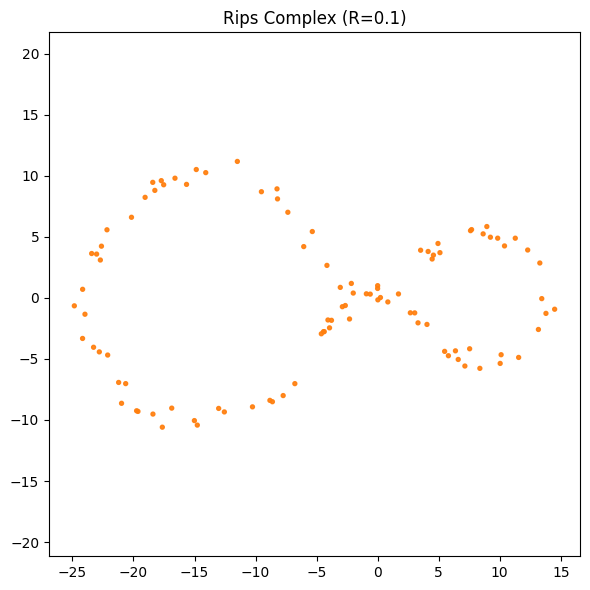

<Figure size 800x600 with 0 Axes>

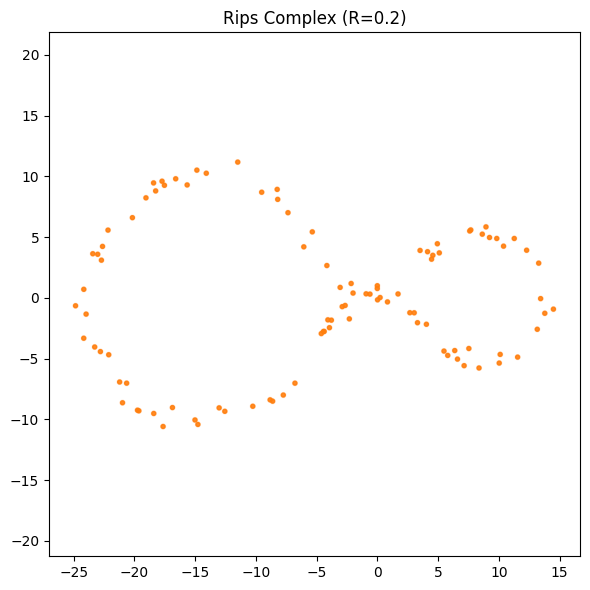

<Figure size 800x600 with 0 Axes>

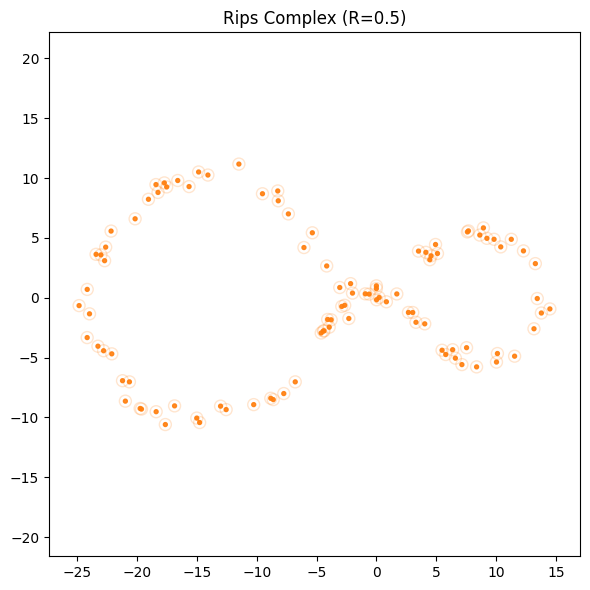

<Figure size 800x600 with 0 Axes>

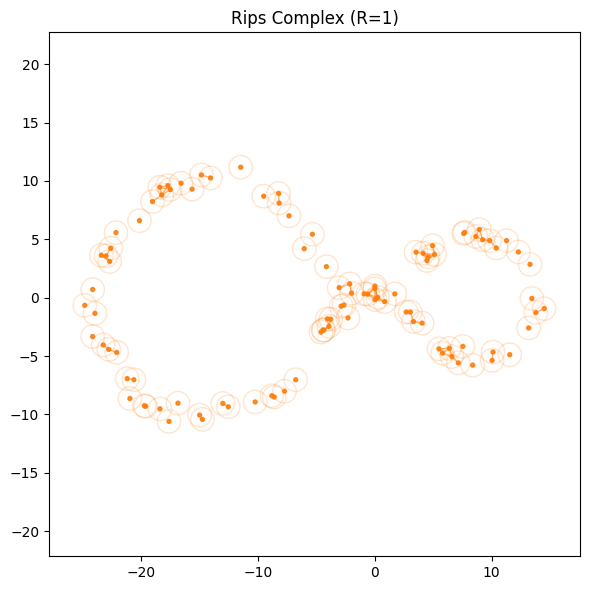

In [48]:
# Llama a la función para graficar los complejos de Rips con distintos radios
plot_rips_complexes(data, radios)

### Alpha

In [49]:
alpha1 = gudhi.AlphaComplex(points = X)

simplex_tree = alpha1.create_simplex_tree()

result_str = 'Alpha complex 1 is of dimension ' + ' - ' + \
  repr(simplex_tree.num_simplices()) + ' simpllices - ' + \
  repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)
fmt = '%s -> %f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex 1 is of dimension  - 565 simpllices - 101 vertices.
[0] -> 0.000000
[1] -> 0.000000
[2] -> 0.000000
[3] -> 0.000000
[4] -> 0.000000
[5] -> 0.000000
[6] -> 0.000000
[7] -> 0.000000
[8] -> 0.000000
[9] -> 0.000000
[10] -> 0.000000
[11] -> 0.000000
[12] -> 0.000000
[13] -> 0.000000
[14] -> 0.000000
[15] -> 0.000000
[16] -> 0.000000
[17] -> 0.000000
[18] -> 0.000000
[19] -> 0.000000
[20] -> 0.000000
[21] -> 0.000000
[22] -> 0.000000
[23] -> 0.000000
[24] -> 0.000000
[25] -> 0.000000
[26] -> 0.000000
[27] -> 0.000000
[28] -> 0.000000
[29] -> 0.000000
[30] -> 0.000000
[31] -> 0.000000
[32] -> 0.000000
[33] -> 0.000000
[34] -> 0.000000
[35] -> 0.000000
[36] -> 0.000000
[37] -> 0.000000
[38] -> 0.000000
[39] -> 0.000000
[40] -> 0.000000
[41] -> 0.000000
[42] -> 0.000000
[43] -> 0.000000
[44] -> 0.000000
[45] -> 0.000000
[46] -> 0.000000
[47] -> 0.000000
[48] -> 0.000000
[49] -> 0.000000
[50] -> 0.000000
[51] -> 0.000000
[52] -> 0.000000
[53] -> 0.000000
[54] -> 0.000000
[55] -> 0